In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv as read
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
class Solver:
    def __init__(self, data, lb_ecnoder_columns, dummies_columns):
        self.data=copy.deepcopy(data)
        self.lb_ecnoder_columns= lb_ecnoder_columns
        self.dummies_columns= dummies_columns
        self.X = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.X_train = pd.DataFrame()
        self.y = pd.DataFrame()
        self.y_test = pd.DataFrame()
        self.y_train = pd.DataFrame()
        self._data_prep()
    def _data_prep(self):
        #Подготовим данные (проработаем категориальные признаки, разобьем на тестовую и обучающую выборки)
        self._ecnoder(self.lb_ecnoder_columns)
        self.data = pd.get_dummies( self.data, columns = self.dummies_columns )
        self.y = self.data['income']
        self.X = copy.deepcopy(self.data)
        del self.X['income']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=85,stratify=self.y)
    def _ecnoder(self,lb_ecnoder_columns):
        for i in lb_ecnoder_columns:
            le = LabelEncoder()
            le.fit(self.data[i])
            self.data[i]=le.transform(self.data[i])
    #Функция для рисования графиков
    def _featuring_imp(self, importance, model_name):
        
        feat_import = {importance[i]:self.data.columns[i] for i in range(len(importance))}
        feat_import=dict(sorted(feat_import.items(),reverse=True))
        
        plt.figure(figsize=(20, 10), dpi=80)
        plt.bar([*feat_import.values()][:7], [*feat_import.keys()][:7], color='b')
        plt.suptitle(f'Важность признаков {model_name}', fontsize=20)
        plt.show()
    #1 модель
    def LogisticRegression_model(self, show_plots=False):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model_name = 'LogisticRegression'
        
        #Используем StandardScaler() для стандартизации
        model = make_pipeline(
        StandardScaler(),
        LogisticRegression())
        
        #Обучаем модель
        model.fit(X_train, y_train)
        #Выводим точность
        print(f'accuracy of {model_name} = {model.score(X_test, y_test)}')
        
        #Рисуем график важности признаков если необходимо
        if show_plots:
            importance = model[1].coef_[0]
            self._featuring_imp(importance, model_name)
        
    #2 модель 
    def SVM_model(self, show_plots=False):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        model_name = 'SVC'
        
        #Используем StandardScaler() для стандартизации
        model = make_pipeline(
        StandardScaler(),
        svm.SVC(kernel='linear'))
        
        #Обучаем модель
        model.fit(X_train, y_train)
        #Выводим точность
        print(f'accuracy of {model_name} = {model.score(X_test, y_test)}')
        
        #Рисуем график важности признаков если необходимо
        if show_plots:
            importance = model[1].coef_[0]
            self._featuring_imp(importance, model_name)


In [3]:
path = r"adult.csv"
data = read(path)

In [4]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.info()
#Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
le = LabelEncoder()
le.fit(data['education'])
data['education']=le.transform(data['education'])

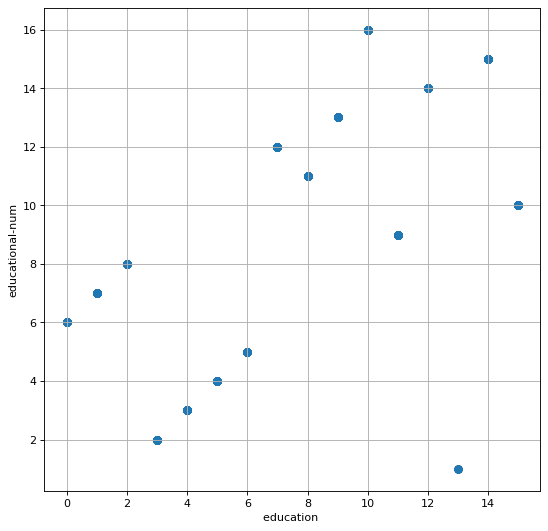

In [7]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(data['education'], data['educational-num'])
plt.ylabel('educational-num')
plt.xlabel('education ')
plt.grid(True)

In [8]:
#Видно, что смысл данных дублируется
del data['education']

In [9]:
len(data['fnlwgt'].unique())

28523

In [10]:
#Слишком много уникальных значений
del data['fnlwgt']

In [11]:
len(data['gender'].unique())
#Видим что этот признак бинарный

2

In [12]:
#Бинарные признаки и признаки увелиличение или уменьшение которых может играть роль
#В данном случае у нас только 1 призак (бинарный)
lb_ecnoder_columns = ['gender']
# Остальные категориальные признаки разбиваем с помощью get_dummies
dummies_columns = ['workclass',  'marital-status', 'occupation','relationship', 'race', 'native-country']

In [13]:
#Создадим экземпляр класса для решения
solver1 = Solver(data, lb_ecnoder_columns, dummies_columns)

accuracy of LogisticRegression = 0.8503429214863343


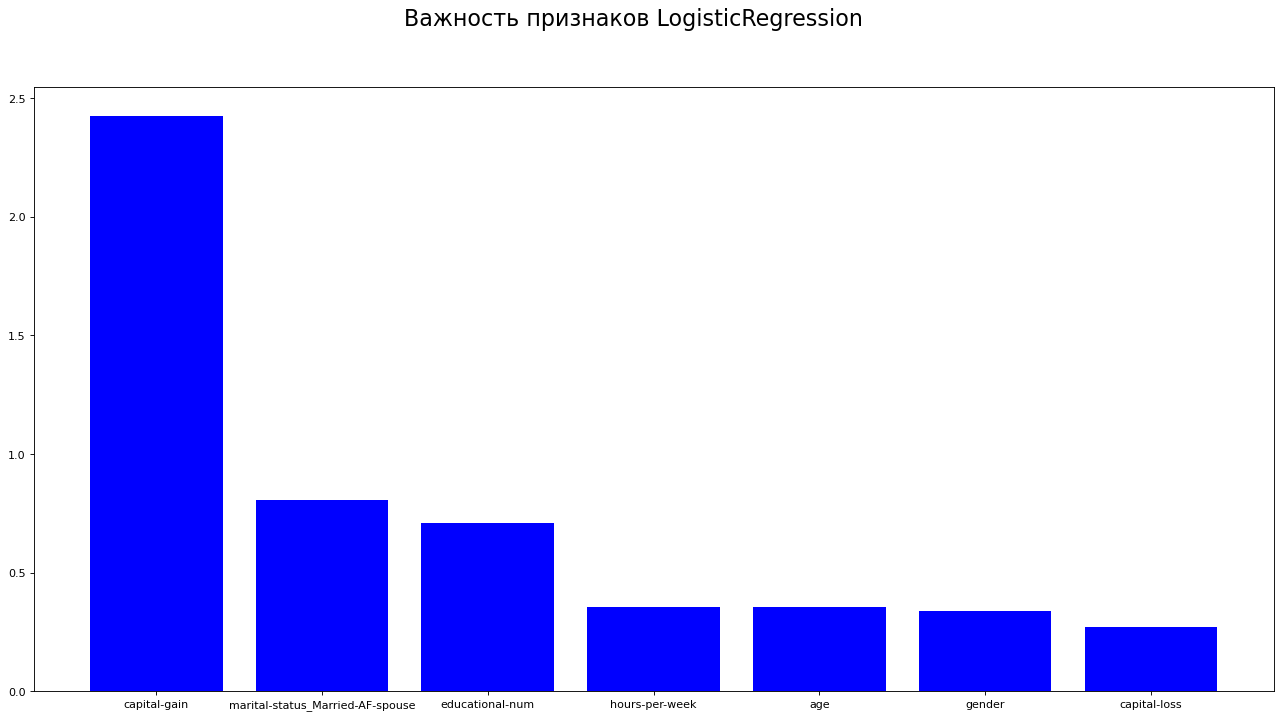

In [14]:
solver1.LogisticRegression_model(show_plots=True)

accuracy of SVC = 0.8518783908281298


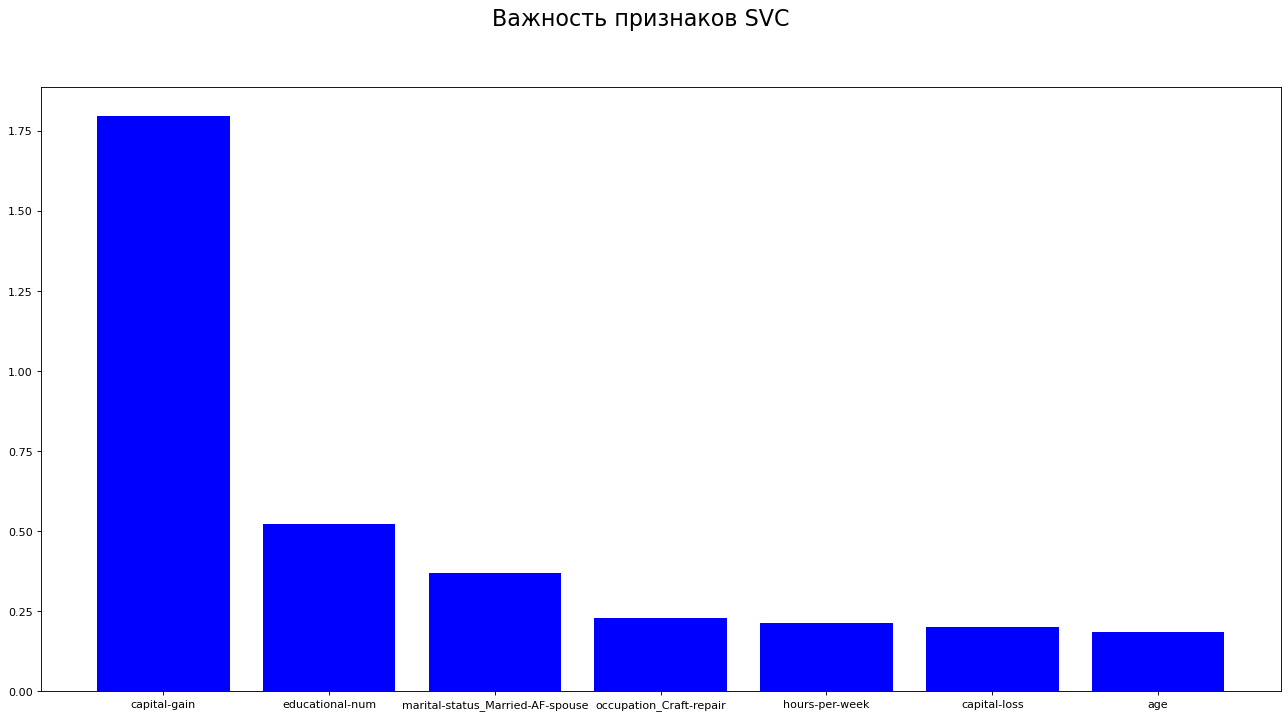

In [15]:
solver1.SVM_model(show_plots=True)

In [16]:
#Точность моделей примерно совпадает
#Для улучшения можно избавится от признаков с плохой важностью или попробовать другие модели